In [1]:
# importing basic libraries

import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset
lead = pd.read_csv('C:/Users/Administrator/Desktop/PGDDS/ML/Case Study/Lead Scoring Assignment/Leads.csv')

In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# Dropping unnecessary columns or columns with just one value
lead.drop(['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [6]:
lead.shape

(9240, 30)

In [7]:
# Substititing nan for the value Select. This is because the customer might not have selected the value from the drop down
lead.loc[lead['Specialization']=='Select', 'Specialization'] = np.nan
lead.loc[lead['How did you hear about X Education']=='Select', 'How did you hear about X Education'] = np.nan
lead.loc[lead['Lead Profile']=='Select', 'Lead Profile'] = np.nan
lead.loc[lead['City']=='Select', 'City'] = np.nan

In [8]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [9]:
# checking the count of values for the features
for col in lead.columns:
    print(100*lead[col].value_counts()/len(lead[col]),'\n\n')  

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
testone               0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
Pay per Click Ads     0.010823
youtubechannel        0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64 


No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 


No     99.978355
Y

For features 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Do Not Call', more than 99% data has only one value.It is clear that these columns will not make much impact and can be dropped.

In [10]:
# dropping the columns
lead.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Do Not Call'], axis = 1, inplace = True)

In [11]:
lead.shape

(9240, 23)

In [12]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.7077

### column _'City'_ and _'Country'_

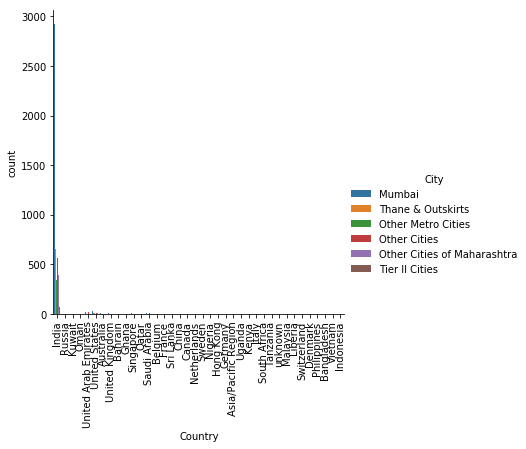

<Figure size 432x288 with 0 Axes>

In [13]:
# country vs city plot
sns.catplot(x = 'Country', hue  = 'City', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [14]:
# Country vs City
100*lead.groupby(['Country', 'City'])['City'].count().sort_values(ascending = False)/len(lead['City'])

Country               City                       
India                 Mumbai                         31.580087
                      Thane & Outskirts               7.045455
                      Other Cities                    6.103896
                      Other Cities of Maharashtra     4.231602
                      Other Metro Cities              3.733766
                      Tier II Cities                  0.746753
United States         Mumbai                          0.324675
United Arab Emirates  Other Cities                    0.205628
                      Mumbai                          0.183983
Saudi Arabia          Other Cities                    0.097403
                      Mumbai                          0.075758
Singapore             Mumbai                          0.064935
Australia             Mumbai                          0.064935
United Kingdom        Mumbai                          0.064935
United States         Other Cities                    0.064935
     

In [15]:
# Country NA vs converted
(lead.loc[lead['Country'].isnull()]).groupby('Converted')['Converted'].count()

Converted
0    1385
1    1076
Name: Converted, dtype: int64

In [16]:
# City NA vs converted
(lead.loc[lead['City'].isnull()]).groupby('Converted')['Converted'].count()

Converted
0    2412
1    1257
Name: Converted, dtype: int64

In [17]:
# City NA vs Country
(lead.loc[lead['City'].isnull()]).groupby('Country')['Country'].count()

Country
Asia/Pacific Region        2
Australia                  2
Canada                     1
China                      1
Ghana                      1
Hong Kong                  1
India                   1554
Italy                      1
Oman                       1
Qatar                      2
Russia                     1
Singapore                  7
South Africa               1
Sri Lanka                  1
Sweden                     2
Uganda                     1
United Arab Emirates       9
United Kingdom             3
United States             18
unknown                    5
Name: Country, dtype: int64

In [18]:
# Country NA vs City
(lead.loc[lead['Country'].isnull()]).groupby('City')['City'].count()

City
Mumbai                         211
Other Cities                    55
Other Cities of Maharashtra     43
Other Metro Cities              15
Thane & Outskirts               80
Tier II Cities                   2
Name: City, dtype: int64

__From above analysis between city and country we can see that for more than 30% of the rows the combination is _'Country' = 'India'_ and _'City' = 'Mumbai'_.__ It will be difficult to do mode imputation for these two columns nor can we confidntly assign any other value to this variable. In light of this it is better to drop these two columns.

In [19]:
# dropping the columns country and city

lead.drop(['Country','City'], axis = 1, inplace = True)

In [20]:
lead.shape

(9240, 21)

In [21]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.6493

### column _'Specialization'

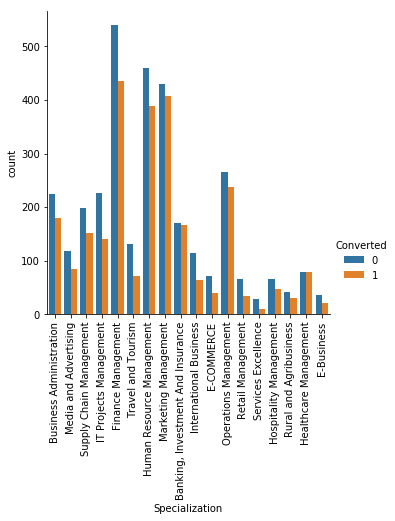

<Figure size 432x288 with 0 Axes>

In [22]:
# specialisation vs converted
sns.catplot(x = 'Specialization', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [23]:
# specialisation NA vs converted
(lead.loc[lead['Specialization'].isnull()]).groupby('Converted')['Converted'].count()

Converted
0    2411
1     969
Name: Converted, dtype: int64

Out of 3380 null values in column _'Specialisation'_, 969 are converted. So in order to treat the null values we can impute the null values with aother value __'Other'__ so that column is retained.

In [24]:
# imputing the NAs in 'specialisation'
lead.loc[lead['Specialization'].isnull(), 'Specialization'] = 'Other'

In [25]:
lead.shape

(9240, 21)

In [26]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                    0.000000
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.6493

### column _'Lead Source'_

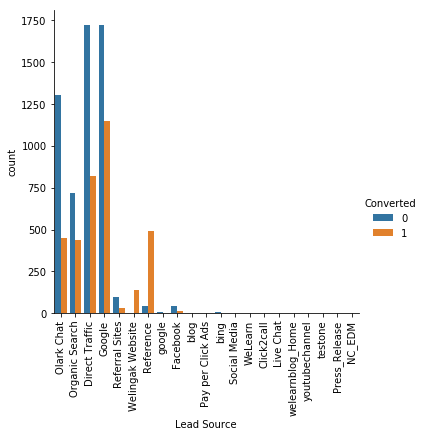

<Figure size 432x288 with 0 Axes>

In [27]:
# Lead Source vs converted
sns.catplot(x = 'Lead Source', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [28]:
lead.groupby('Lead Source')['Lead Source'].count().sort_values(ascending = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [29]:
# google has two spellings. Corrrecting it
lead.loc[lead['Lead Source']=='google', 'Lead Source'] = 'Google'

__The missing values in 'Lead Source' column can be imputed with value 'Other'__

In [30]:
# imputing the null value with 'Other'
lead.loc[lead['Lead Source'].isnull(), 'Lead Source'] = 'Other'

In [31]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                    0.000000
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.6493

In [32]:
lead.shape

(9240, 21)

### column 'Current Occupation'

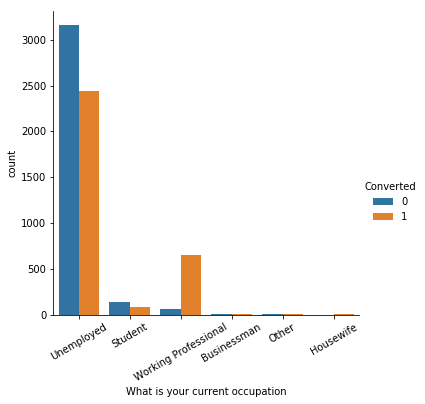

<Figure size 432x288 with 0 Axes>

In [33]:
# What is your current occupation vs converted
sns.catplot(x = 'What is your current occupation', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=30)
plt.show()
plt.tight_layout()

### 'What is your current occupation' vs 'Specialization'

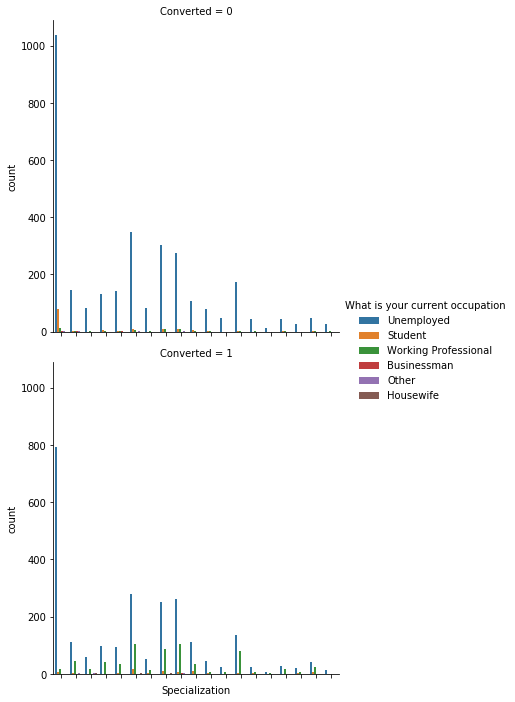

<Figure size 432x288 with 0 Axes>

In [34]:
# What is your current occupation vs Specialization
sns.catplot(x = 'Specialization', hue  = 'What is your current occupation', row = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [35]:
# 'What is your current occupation' NA vs converted
(lead.loc[lead['What is your current occupation'].isnull()]).groupby('Converted')['Converted'].count()

Converted
0    2320
1     370
Name: Converted, dtype: int64

__The misisng values in the column 'What is your current occupation' can be assigned the value 'Other'__

In [36]:
lead.loc[lead['What is your current occupation'].isnull(),'What is your current occupation'] = 'Other'

In [37]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                    0.000000
How did you hear about X Education               78.463203
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.6493

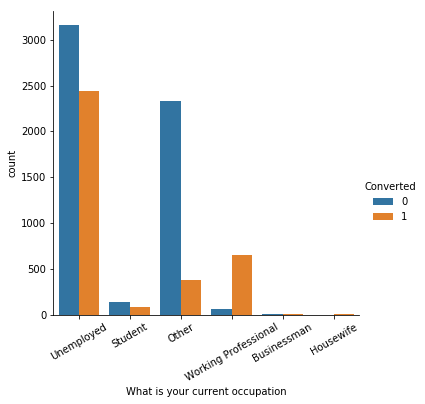

<Figure size 432x288 with 0 Axes>

In [38]:
# What is your current occupation vs converted after imputation
sns.catplot(x = 'What is your current occupation', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=30)
plt.show()
plt.tight_layout()

### column 'What matters most to you in choosing a course'

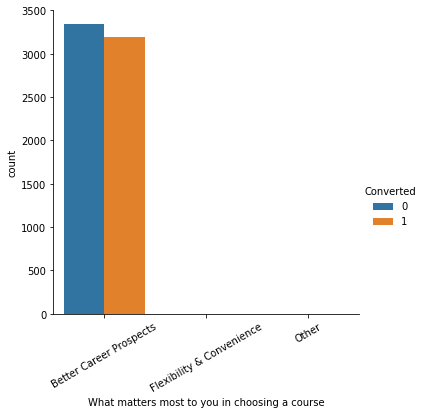

<Figure size 432x288 with 0 Axes>

In [39]:
# What matters most to you in choosing a course vs converted
sns.catplot(x = 'What matters most to you in choosing a course', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=30)
plt.show()
plt.tight_layout()

In [40]:
lead.groupby('What matters most to you in choosing a course')['What matters most to you in choosing a course'].count()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

__Here mpre than 70% of the value is Better Career Prospects. The remaining two values are <1 percent. So, we can safely consider that majority of the customers choose the course for better career opportunities. Hence, this column can be dropped__

In [41]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

### column Tags

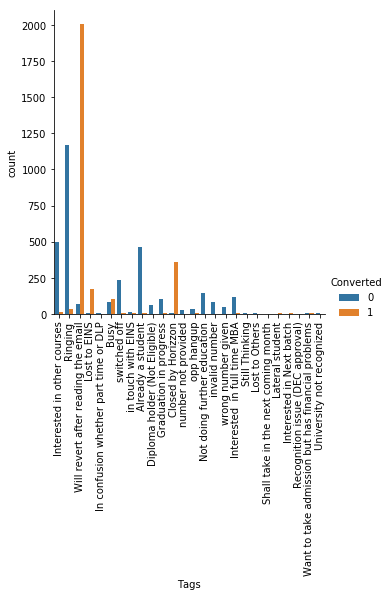

<Figure size 432x288 with 0 Axes>

In [42]:
# Tags vs converted
sns.catplot(x = 'Tags', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [43]:
# 'Tags' NA vs converted
(lead.loc[lead['Tags'].isnull()]).groupby('Converted')['Converted'].count()

Converted
0    2517
1     836
Name: Converted, dtype: int64

__imputing missing values with the value 'Other'__


In [44]:
lead.loc[lead['Tags'].isnull(), 'Tags'] = 'Other'

In [45]:
lead.shape

(9240, 20)

In [46]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
A free copy of Mastering The Interview     0.000000
Last Notable

### column 'Asymmetrique Activity Index'

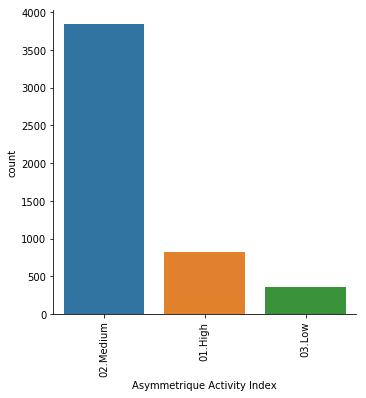

<Figure size 432x288 with 0 Axes>

In [47]:
sns.catplot(x = 'Asymmetrique Activity Index', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

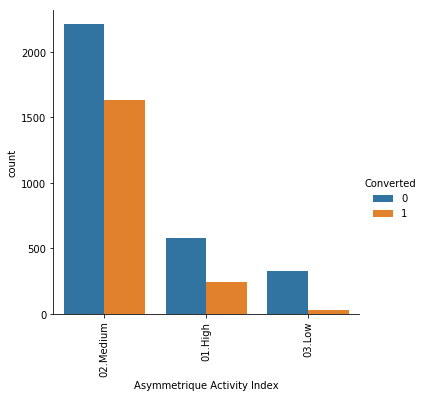

<Figure size 432x288 with 0 Axes>

In [48]:
sns.catplot(x = 'Asymmetrique Activity Index', hue = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

dropping 'Asymmetrique Activity Index'  as not practical to impute since we have no idea how these index values were obtained.

In [49]:
lead.drop('Asymmetrique Activity Index', axis = 1, inplace = True)

In [50]:
lead.shape

(9240, 19)

In [51]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float

### column Asymmetrique Profile Index

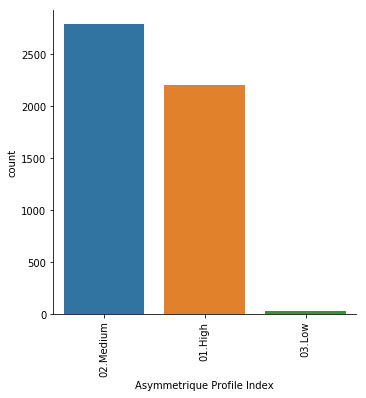

<Figure size 432x288 with 0 Axes>

In [52]:
sns.catplot(x = 'Asymmetrique Profile Index', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

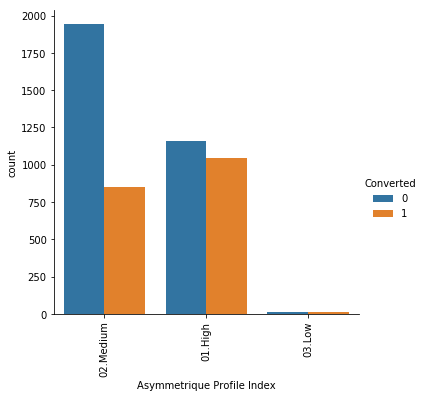

<Figure size 432x288 with 0 Axes>

In [53]:
sns.catplot(x = 'Asymmetrique Profile Index', hue = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

dropping 'Asymmetrique Profile Index' as not practical to impute since we have no idea how these index values were obtained.


In [54]:
lead.drop('Asymmetrique Profile Index', axis = 1, inplace = True)

In [55]:
lead.shape

(9240, 18)

In [56]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### column 'Asymmetrique Activity Score'

In [57]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


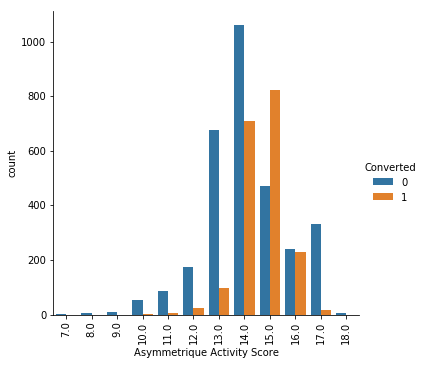

<Figure size 432x288 with 0 Axes>

In [58]:
sns.catplot(x = 'Asymmetrique Activity Score', hue = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

dropping 'Asymmetrique Activity Score' as not practical to impute since we have no idea how these index values were obtained.

In [59]:
lead.drop('Asymmetrique Activity Score', axis = 1, inplace = True)

In [60]:
lead.shape

(9240, 17)

In [61]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
Asymmetrique Profile Score                45.649351
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### column Asymmetrique Profile Score

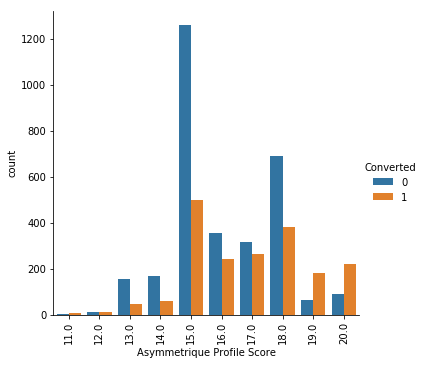

<Figure size 432x288 with 0 Axes>

In [62]:
sns.catplot(x = 'Asymmetrique Profile Score', hue = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

dropping 'Asymmetrique Profile Score' as not practical to impute since we have no idea how these index values were obtained.

In [63]:
lead.drop('Asymmetrique Profile Score', axis = 1, inplace = True)

In [64]:
lead.shape

(9240, 16)

In [65]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### column TotalVisits

In [66]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

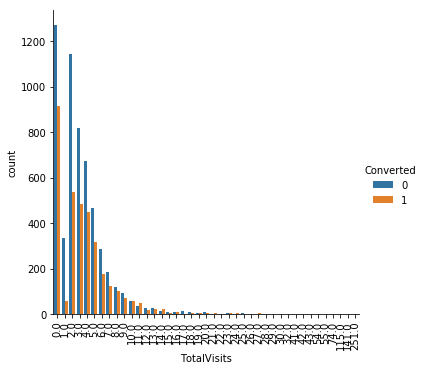

<Figure size 432x288 with 0 Axes>

In [67]:
sns.catplot(x = 'TotalVisits', hue = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [68]:
lead.groupby('TotalVisits')['TotalVisits'].count().sort_values(ascending = False)

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
26.0        2
28.0        2
43.0        1
115.0       1
74.0        1
55.0        1
54.0        1
141.0       1
42.0        1
41.0        1
32.0        1
30.0        1
251.0       1
Name: TotalVisits, dtype: int64

In [69]:
100*lead.loc[lead['TotalVisits'].isnull()].groupby('Converted')['Converted'].count()/len(lead['Converted'])

Converted
0    0.400433
1    1.082251
Name: Converted, dtype: float64

We can take a median value of three for imputation of null values

In [70]:
lead.loc[lead['TotalVisits'].isnull(), 'TotalVisits'] = 3

In [71]:
lead.shape

(9240, 16)

In [72]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### column Page Views Per Visit

In [73]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

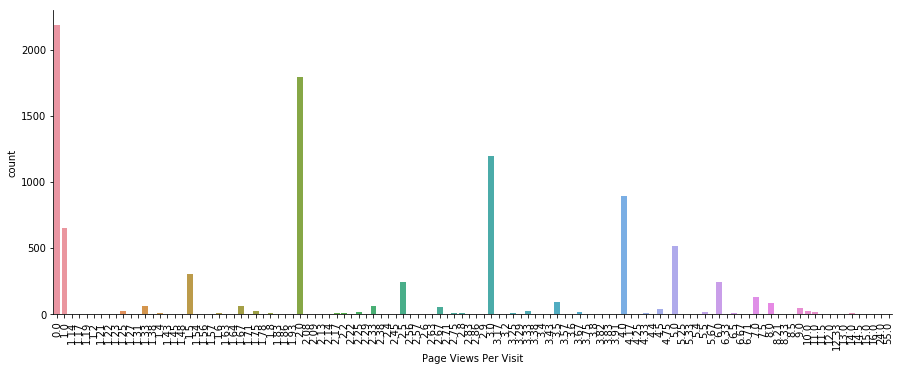

<Figure size 432x288 with 0 Axes>

In [74]:
sns.catplot(x = 'Page Views Per Visit', data = lead, kind = 'count', aspect = 2.5).set_xticklabels(rotation=90)
plt.show()
plt.tight_layout()

In [75]:
lead.groupby('Page Views Per Visit')['Page Views Per Visit'].count().sort_values(ascending = False)

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.31        1
1.27        1
1.21        1
8.21        1
1.63        1
3.91        1
4.17        1
2.63        1
24.00       1
2.57        1
2.56        1
2.86        1
2.45        1
2.90        1
2.38        1
3.17        1
2.29        1
3.29        1
3.38        1
3.43        1
2.14        1
2.13        1
3.57        1
2.08        1
1.93        1
1.86        1
3.80        1
3.82        1
3.83        1
55.00       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [76]:
100*lead.loc[lead['Page Views Per Visit'].isnull()].groupby('Converted')['Converted'].count()/len(lead['Converted'])

Converted
0    0.400433
1    1.082251
Name: Converted, dtype: float64

We can take a median value of two for imputation of null values

In [77]:
lead.loc[lead['Page Views Per Visit'].isnull(), 'Page Views Per Visit'] = 2

In [78]:
lead.shape

(9240, 16)

In [79]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              1.114719
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### column Last Activity

In [80]:
lead['Last Activity'].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [81]:
lead.groupby('Last Activity')['Last Activity'].count().sort_values(ascending = False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

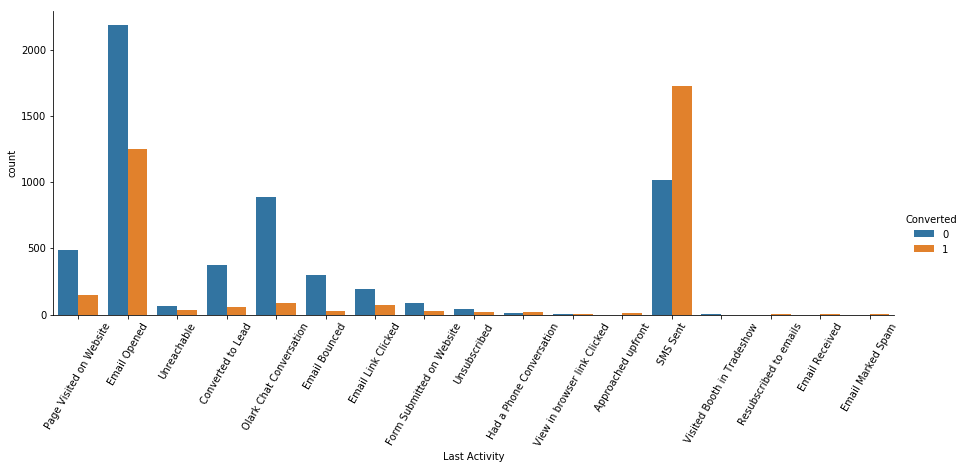

<Figure size 432x288 with 0 Axes>

In [82]:
sns.catplot(x = 'Last Activity', hue = 'Converted', data = lead, kind = 'count', aspect = 2.5).set_xticklabels(rotation=60)
plt.show()
plt.tight_layout()

Imputing with the value Other as we cannot know for sure what was the last activity. Email opened has the highest frequency but the customer might also not have opened the email.

In [83]:
lead.loc[lead['Last Activity'].isnull(),'Last Activity'] = 'Other'

In [84]:
lead.shape

(9240, 16)

In [85]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                              51.590909
Lead Profile                              74.188312
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### colum Lead Quality

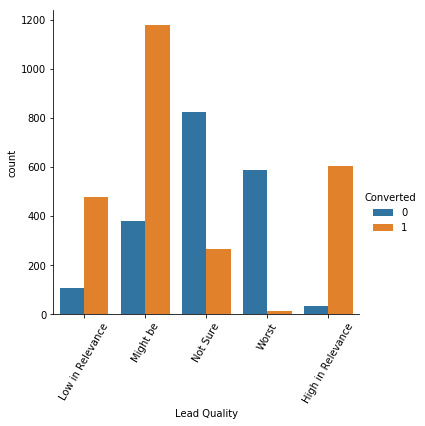

<Figure size 432x288 with 0 Axes>

In [86]:
# Lead Quality vs converted
sns.catplot(x = 'Lead Quality', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=60)
plt.show()
plt.tight_layout()

In [87]:
# 'Lead Quality' NA vs converted
(lead.loc[lead['Lead Quality'].isnull()]).groupby('Converted')['Converted'].count()

Converted
0    3743
1    1024
Name: Converted, dtype: int64

imputing the null values with the value Not Sure because deleting the rows would result in loss of data. Also, not sure is more suited than creating a separate bucket as we actually do not know what the missing values are.

In [88]:
lead.loc[lead['Lead Quality'].isnull(), 'Lead Quality'] = 'Not Sure'

In [89]:
lead.shape

(9240, 16)

In [90]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                               0.000000
Lead Profile                              74.188312
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

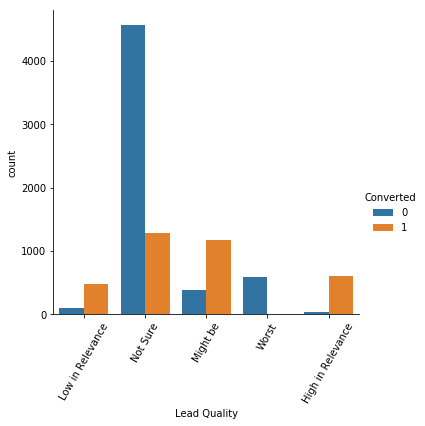

<Figure size 432x288 with 0 Axes>

In [91]:
# Lead Quality vs converted after imputation
sns.catplot(x = 'Lead Quality', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation=60)
plt.show()
plt.tight_layout()

### column Lead Profile

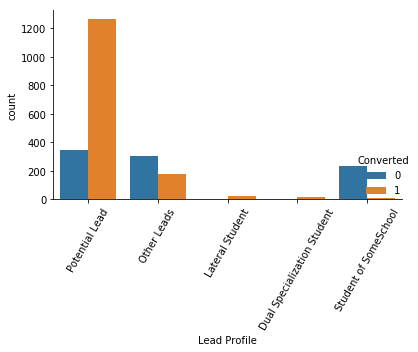

In [92]:
# Lead Profile vs converted
sns.catplot(x = 'Lead Profile', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation = 60)
plt.tight_layout()

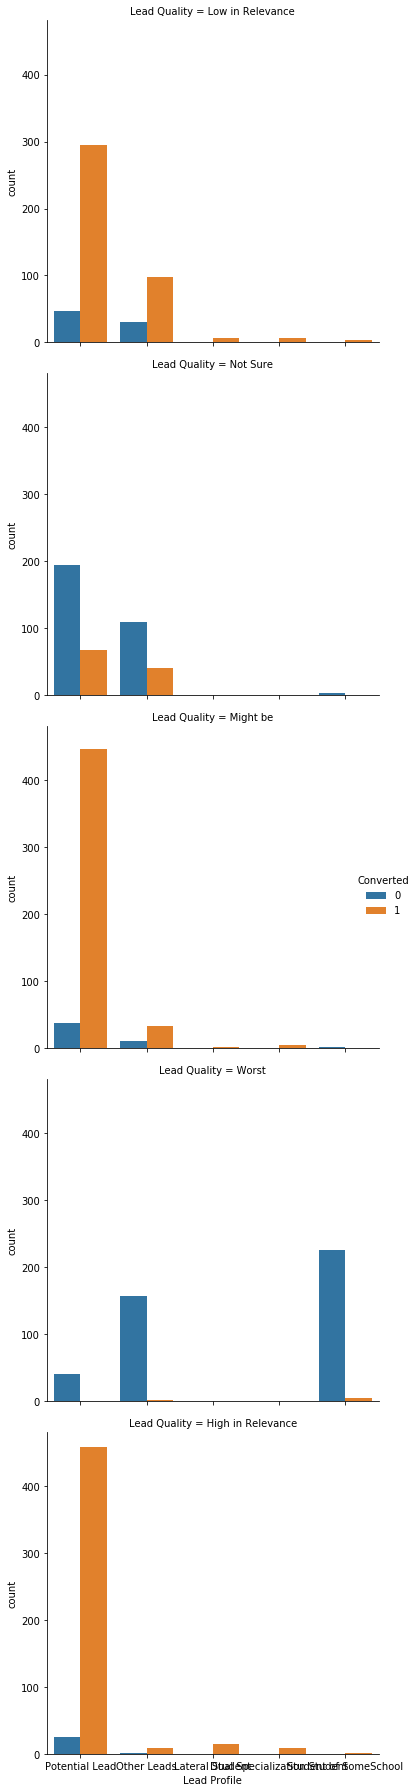

In [93]:
# Lead Profile vs converted
sns.catplot(x = 'Lead Profile', hue  = 'Converted', row = 'Lead Quality', data = lead, kind = 'count')
plt.tight_layout()

Creating a seperate bucket as 'Unprofiled' for the null values as these leads might not be profiled

In [94]:
lead.loc[lead['Lead Profile'].isnull(), 'Lead Profile'] = 'Unprofiled'

In [95]:
lead.shape

(9240, 16)

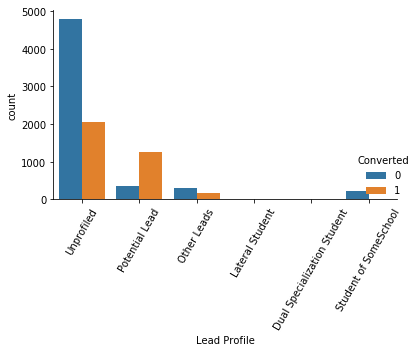

In [96]:
# Lead Profile vs converted after imputation
sns.catplot(x = 'Lead Profile', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation = 60)
plt.tight_layout()

In [97]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                                0.000000
Lead Source                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                0.000000
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.000000
Last Activity                              0.000000
Specialization                             0.000000
How did you hear about X Education        78.463203
What is your current occupation            0.000000
Tags                                       0.000000
Lead Quality                               0.000000
Lead Profile                               0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

### Column 'How did you hear about X Education'

In [98]:
lead['How did you hear about X Education'].describe()

count              1990
unique                9
top       Online Search
freq                808
Name: How did you hear about X Education, dtype: object

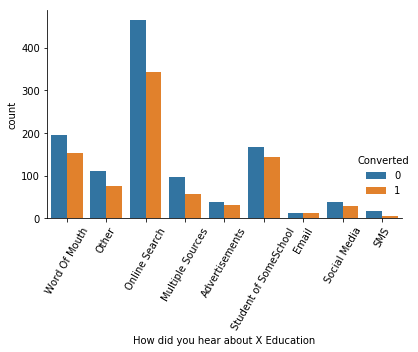

In [99]:
# 'How did you hear about X Education' vs converted
sns.catplot(x = 'How did you hear about X Education', hue  = 'Converted', data = lead, kind = 'count').set_xticklabels(rotation = 60)
plt.tight_layout()

In [100]:
# count of the null rows for this column
count_null = lead['How did you hear about X Education'].isnull().sum()
count_null

7250

In [101]:
# count of the not null rows for this column
count_not_null = lead['How did you hear about X Education'].notnull().sum()
count_not_null

1990

In [102]:
# calculating the percentages of values for this column in the not null rows
percentage_not_null = lead.groupby('How did you hear about X Education')['How did you hear about X Education'].count().sort_values(ascending = False)/count_not_null
percentage_not_null

How did you hear about X Education
Online Search            0.406030
Word Of Mouth            0.174874
Student of SomeSchool    0.155779
Other                    0.093467
Multiple Sources         0.076382
Advertisements           0.035176
Social Media             0.033668
Email                    0.013065
SMS                      0.011558
Name: How did you hear about X Education, dtype: float64

In [103]:
# based on the existing percentage of the not null values finding the number of these values to fill in the null rows
null_distribution = count_null*lead.groupby('How did you hear about X Education')['How did you hear about X Education'].count().sort_values(ascending = False)/count_not_null
null_distribution

How did you hear about X Education
Online Search            2943.718593
Word Of Mouth            1267.839196
Student of SomeSchool    1129.396985
Other                     677.638191
Multiple Sources          553.768844
Advertisements            255.025126
Social Media              244.095477
Email                      94.723618
SMS                        83.793970
Name: How did you hear about X Education, dtype: float64

In [104]:
null_distribution[1]

1267.8391959798994

__Randomly assigning these values to the null rows__

In [105]:
n= ['Online Search', 'Word Of Mouth',            
'Student of SomeSchool',    
'Other',                     
'Multiple Sources',
'Advertisements',           
'Social Media',              
'Email',                      
'SMS']

In [106]:
groups = list(null_distribution)
a = sum(groups)
a
l = [w/a for w in groups]
l

[0.40603015075376886,
 0.1748743718592965,
 0.15577889447236185,
 0.0934673366834171,
 0.0763819095477387,
 0.03517587939698493,
 0.033668341708542715,
 0.013065326633165831,
 0.011557788944723618]

In [107]:
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna(pd.Series(np.random.choice(n, 
                                                      p= l, size=len(lead))))
lead['How did you hear about X Education'].describe()

count              9240
unique                9
top       Online Search
freq               3790
Name: How did you hear about X Education, dtype: object

In [108]:
100*lead.isnull().sum(axis = 0)/lead.shape[0]

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [109]:
lead.shape

(9240, 16)

In [110]:
for col in lead.columns:
    print(100*lead[col].value_counts()/len(lead[col]),'\n\n')  

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 


Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
Other                 0.389610
bing                  0.064935
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
WeLearn               0.010823
welearnblog_Home      0.010823
Pay per Click Ads     0.010823
blog                  0.010823
youtubechannel        0.010823
NC_EDM                0.010823
testone               0.010823
Name: Lead Source, dtype: float64 


No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64 


0    61.461039
1  

### data preparation

In [111]:
# converting yes to 1 and no to 0

lead['Do Not Email'] = lead['Do Not Email'].map({'Yes':1, 'No':0})
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

### Dummy variable creation

In [112]:
def create_dummy(df):
    '''function that creates dummy variable for the categorical features
    and return the updated DataFrame'''
    for col in df.columns: # extracting the feature
        if df[col].dtype == 'O': # is the feature type object ?
            dummy = pd.get_dummies(df[col], prefix = col, drop_first = True) # creating dummy variable and dropping the original column
            df = pd.concat([df, dummy], axis = 1) # concatenating the dummy variables with the original DataFrame
            df.drop(col, axis = 1, inplace = True)
    return (df) 

In [113]:
lead_dummy = create_dummy(lead)

In [114]:
lead_dummy.shape

(9240, 128)

In [115]:
lead_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 128 entries, Do Not Email to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(4), uint8(122)
memory usage: 1.5 MB


## test-train split

In [116]:
from sklearn.model_selection import train_test_split

# putting predictors to X
X = lead_dummy.drop('Converted', axis = 1)

# putting response variable to y
y = lead_dummy['Converted']

In [117]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [119]:
# splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [120]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (6468, 127)
X_test: (2772, 127)
y_train: (6468,)
y_test: (2772,)


## Feature scaling

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [122]:
# checking the rate of conversion

conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
conversion

38.53896103896104

## Feature selection using RFE

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [124]:
col = X_train.columns[rfe.support_] # features selected

### Model building

In [125]:
import statsmodels.api as sm

In [126]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1253.2
Date:                Sun, 03 Mar 2019   Deviance:                       2506.3
Time:                        21:29:22   Pearson chi2:                 1.84e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5516      0.276     -5.623      0.000      -2.092      -1.011
Lead Source_Welingak Website                      2.8423      0.754      3.771      0.000       1.365       4.319
Last Activity_SMS Sent                            2.1932      0.122     18.051      0.000       1.955       2.431
What is your current occupation_Other            -2.5348      0.145    -17.453      0.000      -2.819      -2.250
Tags_Busy                                         1.9295      0.298      6.475      0.000       1.345       2.514
Tags_Closed by Horizzon                           8.6529      1.027      8.429      0.000       6.641      10.665
Tags_Lateral student                             25.9797   7.34e+04      0.000      1.000   -1.44e+05    1.44e+05
Tags_Lost to EINS                                 9.5164      0.771     12.347      0.000       8.006      11.027
Tags_Other                                        3.3831      0.246     13.779      0.000       2.902       3.864
Tags_Ringing                                     -1.8669      0.299     -6.252      0.000      -2.452      -1.282
Tags_Will revert after reading the email          5.7242      0.277     20.659      0.000       5.181       6.267
Tags_invalid number                              -2.1858      1.044     -2.093      0.036      -4.233      -0.139
Tags_number not provided                        -22.4574    2.5e+04     -0.001      0.999    -4.9e+04     4.9e+04
Tags_switched off                                -2.3146      0.556     -4.165      0.000      -3.404      -1.225
Tags_wrong number given                         -22.5685   2.12e+04     -0.001      0.999   -4.15e+04    4.15e+04
Lead Quality_Might be                            -1.2081      0.285     -4.241      0.000      -1.766      -0.650
Lead Quality_Not Sure                            -1.3334      0.290     -4.594      0.000      -1.902      -0.765
Lead Quality_Worst                               -3.2433      0.721     -4.501      0.000      -4.656      -1.831
Last Notable Activity_Email Link Clicked         -1.3222      0.474     -2.791      0.005      -2.251      -0.394
Last Notable Activity_Modified                   -1.6000      0.123    -13.052      0.000      -1.840      -1.360
Last Notable Activity_Olark Chat Conversation    -1.1764      0.416     -2.831      0.005      -1.991      -0.362
=================================================================================================================
"""

In [127]:
# creating X_train dataframe using RFE selected variables

X_train_rfe = X_train[col]

In [128]:
def create_glm(X_t, y_t):
    '''function to add constant, create logistic regression model and return the summary
       accepts X_training and y_training DataFrame as parameters
       returns X_training with constant and the logistic regression model
    '''
    X_t = sm.add_constant(X_t) # adding constant
    glm = sm.GLM(y_t, X_t, family = sm.families.Binomial()).fit() # creating logistic regression model
    return (X_t, glm) # return summary of logistic regression model

In [129]:
def remove_feature(f, X_t):
    '''function to remove insignificant features
       accepts the feature name as string and DataFrame from which it is to be removed
       returns the DataFrame after dropping the feature
    '''
    return (X_t.drop(f, axis = 1))  

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X_t):
    '''Function to calculate VIF
       Accepta the DataFrame
       Returns the Feature name with their VIF rounded off to two decimal places as a DataFrame
    '''
    vif = pd.DataFrame()
    X = X_t.drop('const', axis = 1) # dropping the constant column
    vif['Features'] = X.columns # Feature name column
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # calculating VIF
    vif['VIF'] = round(vif['VIF'], 2) # rounding off
    vif = vif.sort_values(by = 'VIF', ascending = False) # sorting
    return (vif)

In [131]:
# creating model, printing summary and calculating vif for data 
X_train_glm, glm = create_glm(X_train_rfe, y_train)
print(glm.summary()) 
calculate_vif(X_train_glm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1253.2
Date:                Sun, 03 Mar 2019   Deviance:                       2506.3
Time:                        21:29:23   Pearson chi2:                 1.84e+04
No. Iterations:                    23   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5516     

,Features,VIF
12,Tags_switched off,1.20
3,Tags_Busy,1.16
0,Lead Source_Welingak Website,1.12
6,Tags_Lost to EINS,1.11
4,Tags_Closed by Horizzon,1.09
19,Last Notable Activity_Olark Chat Conversation,1.06
17,Last Notable Activity_Email Link Clicked,1.05
10,Tags_invalid number,1.05
13,Tags_wrong number given,1.03
11,Tags_number not provided,1.02


__From above we see that there is no multicolinearity in the variables. Hence dropping the features based on p-value__

In [132]:
# Dropping high p-value features, updating model and recalculating VIF

X_train_new = remove_feature('Tags_Lateral student', X_train_glm)
X_train_glm, glm = create_glm(X_train_new, y_train)
print(glm.summary()) 
calculate_vif(X_train_glm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1257.6
Date:                Sun, 03 Mar 2019   Deviance:                       2515.2
Time:                        21:29:23   Pearson chi2:                 1.89e+04
No. Iterations:                    23   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4619     

,Features,VIF
11,Tags_switched off,1.20
3,Tags_Busy,1.16
0,Lead Source_Welingak Website,1.12
5,Tags_Lost to EINS,1.11
4,Tags_Closed by Horizzon,1.09
18,Last Notable Activity_Olark Chat Conversation,1.06
16,Last Notable Activity_Email Link Clicked,1.05
9,Tags_invalid number,1.05
12,Tags_wrong number given,1.03
10,Tags_number not provided,1.02


In [133]:
# Dropping high p-value features, updating model and recalculating VIF

X_train_new = remove_feature('Tags_number not provided', X_train_glm)
X_train_glm, glm = create_glm(X_train_new, y_train)
print(glm.summary()) 
calculate_vif(X_train_glm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.4
Date:                Sun, 03 Mar 2019   Deviance:                       2520.9
Time:                        21:29:24   Pearson chi2:                 1.87e+04
No. Iterations:                    22   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5249     

,Features,VIF
10,Tags_switched off,1.20
3,Tags_Busy,1.16
0,Lead Source_Welingak Website,1.12
5,Tags_Lost to EINS,1.11
4,Tags_Closed by Horizzon,1.08
17,Last Notable Activity_Olark Chat Conversation,1.06
15,Last Notable Activity_Email Link Clicked,1.05
9,Tags_invalid number,1.05
11,Tags_wrong number given,1.03
14,Lead Quality_Worst,0.43


In [134]:
# Dropping high p-value features, updating model and recalculating VIF

X_train_new = remove_feature('Tags_wrong number given', X_train_glm)
X_train_glm, glm = create_glm(X_train_new, y_train)
print(glm.summary()) 
calculate_vif(X_train_glm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.5
Date:                Sun, 03 Mar 2019   Deviance:                       2529.0
Time:                        21:29:24   Pearson chi2:                 1.90e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5868     

,Features,VIF
10,Tags_switched off,1.19
3,Tags_Busy,1.16
0,Lead Source_Welingak Website,1.12
5,Tags_Lost to EINS,1.11
4,Tags_Closed by Horizzon,1.08
16,Last Notable Activity_Olark Chat Conversation,1.06
9,Tags_invalid number,1.05
14,Last Notable Activity_Email Link Clicked,1.05
13,Lead Quality_Worst,0.43
2,What is your current occupation_Other,0.26


In [135]:
# Dropping high p-value features, updating model and recalculating VIF

X_train_new = remove_feature('Tags_invalid number', X_train_glm)
X_train_glm, glm = create_glm(X_train_new, y_train)
print(glm.summary()) 
calculate_vif(X_train_glm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.9
Date:                Sun, 03 Mar 2019   Deviance:                       2535.7
Time:                        21:29:25   Pearson chi2:                 1.91e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6775     

,Features,VIF
9,Tags_switched off,1.19
3,Tags_Busy,1.15
0,Lead Source_Welingak Website,1.12
5,Tags_Lost to EINS,1.11
4,Tags_Closed by Horizzon,1.08
15,Last Notable Activity_Olark Chat Conversation,1.06
13,Last Notable Activity_Email Link Clicked,1.05
12,Lead Quality_Worst,0.43
2,What is your current occupation_Other,0.26
8,Tags_Will revert after reading the email,0.21


In [136]:
# Getting the predicted values on the train set
y_train_pred = glm.predict(X_train_glm)
y_train_pred[:10]

1871    0.008649
6795    0.619991
3516    0.008649
8105    0.084588
3934    0.257011
4844    0.993790
3297    0.008649
8071    0.996326
987     0.027044
7423    0.993790
dtype: float64

In [137]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00864931, 0.61999078, 0.00864931, 0.08458771, 0.25701102,
       0.99378965, 0.00864931, 0.99632593, 0.02704446, 0.99378965])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [138]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.008649,1871
1,0,0.619991,6795
2,0,0.008649,3516
3,0,0.084588,8105
4,0,0.257011,3934


##### Creating new column 'Lead Score' = 100xConverted_Prob

In [139]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob']*100
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead_Score
0,0,0.008649,1871,0.864931
1,0,0.619991,6795,61.999078
2,0,0.008649,3516,0.864931
3,0,0.084588,8105,8.458771
4,0,0.257011,3934,25.701102


#### Finding optimal cutoff probability for balanced sensitivity and specificity

In [140]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008649,1871,0.864931,1,0,0,0,0,0,0,0,0,0
1,0,0.619991,6795,61.999078,1,1,1,1,1,1,1,0,0,0
2,0,0.008649,3516,0.864931,1,0,0,0,0,0,0,0,0,0
3,0,0.084588,8105,8.458771,1,0,0,0,0,0,0,0,0,0
4,0,0.257011,3934,25.701102,1,1,1,0,0,0,0,0,0,0


In [141]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.815553     0.971208     0.719640
0.2          0.2  0.918058     0.934712     0.907796
0.3          0.3  0.931509     0.914842     0.941779
0.4          0.4  0.932437     0.911598     0.945277
0.5          0.5  0.931509     0.907948     0.946027
0.6          0.6  0.923160     0.858070     0.963268
0.7          0.7  0.914038     0.810624     0.977761
0.8          0.8  0.904607     0.768856     0.988256
0.9          0.9  0.902134     0.759124     0.990255


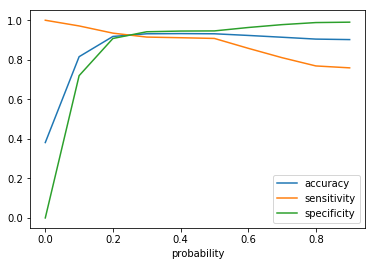

In [142]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [143]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.008649,1871,0.864931,1,0,0,0,0,0,0,0,0,0,0
1,0,0.619991,6795,61.999078,1,1,1,1,1,1,1,0,0,0,1
2,0,0.008649,3516,0.864931,1,0,0,0,0,0,0,0,0,0,0
3,0,0.084588,8105,8.458771,1,0,0,0,0,0,0,0,0,0,0
4,0,0.257011,3934,25.701102,1,1,1,0,0,0,0,0,0,0,1


In [144]:
# accuracy
accuracy2 = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print('Accuracy:', accuracy2)

Accuracy: 0.9180581323438466


In [145]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print(confusion2)

[[3633  369]
 [ 161 2305]]


In [146]:
# Predicted     not_churn    churn
# Actual
# not_churn        3633      369
# churn            161       2305  

Other Metrics

In [147]:
tp2 = confusion2[1,1] # true positive 
tn2 = confusion2[0,0] # true negatives
fp2 = confusion2[0,1] # false positives
fn2 = confusion2[1,0] # false negatives

In [148]:
sensitivity2 = tp2/float(tp2 + fn2)
specificity2 = tn2/float(tn2 + fp2)
false_postive_rate2 = fp2/float(tn2 + fp2)
positive_predictive_value2 = tp2/float(tp2 + fp2)
negative_predictive_value2 = tn2/float(tn2 + fn2)

In [149]:
print('sensitivity:', sensitivity2)
print('specificity:', specificity2)
print('false_postive_rate', false_postive_rate2)
print('positive_predictive_value:', positive_predictive_value2)
print('negative_predictive_value:', negative_predictive_value2)

sensitivity: 0.9347120843471208
specificity: 0.9077961019490255
false_postive_rate 0.09220389805097451
positive_predictive_value: 0.8620044876589379
negative_predictive_value: 0.9575645756457565


#### Precision and recall tradeoff

In [150]:
# calculating precision and recall
from sklearn.metrics import precision_score, recall_score
precision2 = precision_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
recall2 = recall_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

In [151]:
print('precision', precision2)
print('recall', recall2)

precision 0.8620044876589379
recall 0.9347120843471208


In [152]:
# Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

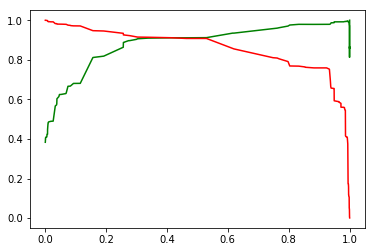

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Plotting ROC curve

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False)

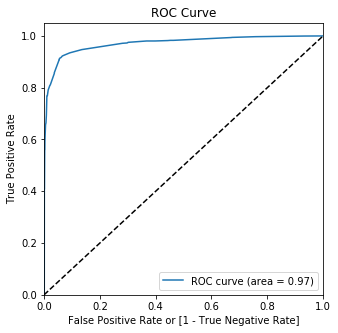

In [156]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

### making predictions on the test set

In [157]:
# scaling
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [158]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2376,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4359,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [159]:
# adding constant
X_test_sm = sm.add_constant(X_test)

In [160]:
# predicting
y_test_pred = res.predict(X_test_sm)

In [161]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
y_pred_1.head()

,0
4269,0.539058
2376,0.998284
7766,0.950947
9199,0.011152
4359,0.984823


In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [167]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.539058
1,1,2376,0.998284
2,1,7766,0.950947
3,0,9199,0.011152
4,1,4359,0.984823


In [168]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [169]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.539058
1,2376,1,0.998284
2,7766,1,0.950947
3,9199,0,0.011152
4,4359,1,0.984823


In [171]:
# calculating lead score
y_pred_final['lead_score'] = y_pred_final['Converted_Prob']*100
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,lead_score
0,4269,1,0.539058,53.905817
1,2376,1,0.998284,99.828366
2,7766,1,0.950947,95.094707
3,9199,0,0.011152,1.115199
4,4359,1,0.984823,98.482276


In [172]:
# assigning cutoff probability for Converted prediction
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head(100)

,Prospect ID,Converted,Converted_Prob,lead_score,final_predicted
0,4269,1,0.539058,53.905817,1
1,2376,1,0.998284,99.828366,1
2,7766,1,0.950947,95.094707,1
3,9199,0,0.011152,1.115199,0
4,4359,1,0.984823,98.482276,1
5,9186,1,0.998284,99.828366,1
6,1631,1,0.984823,98.482276,1
7,8963,1,0.950947,95.094707,1
8,8007,0,0.025666,2.566565,0
9,5324,1,0.998284,99.828366,1


In [173]:
# calculating accuracy for the test set
print('Accuracy:', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy: 0.9314574314574314


In [174]:
# creating confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion3

array([[1550,  127],
       [  63, 1032]], dtype=int64)

Calculating other metrics

In [175]:
tp3 = confusion3[1,1] # true positive 
tn3 = confusion3[0,0] # true negatives
fp3 = confusion3[0,1] # false positives
fn3 = confusion3[1,0] # false negatives

In [176]:
sensitivity3 = tp3/float(tp3 + fn3) #True positive rate
specificity3 = tn3/float(tn3 + fp3) #True negative rate
false_postive_rate3 = fp3/float(tn3 + fp3)
positive_predictive_value3 = tp3/float(tp3 + fp3)
negative_predictive_value3 = tn3/float(tn3 + fn3)

In [177]:
print('sensitivity:', sensitivity3)
print('specificity:', specificity3)
print('false_postive_rate', false_postive_rate3)
print('positive_predictive_value:', positive_predictive_value3)
print('negative_predictive_value:', negative_predictive_value3)

sensitivity: 0.9424657534246575
specificity: 0.9242695289206917
false_postive_rate 0.07573047107930829
positive_predictive_value: 0.8904227782571182
negative_predictive_value: 0.9609423434593924


#### Analyzing the model to find out impact of variables on lead conversion

In [178]:
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.9
Date:                Sun, 03 Mar 2019   Deviance:                       2535.7
Time:                        21:29:36   Pearson chi2:                 1.91e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6775     

__Odds Ratio__

In [179]:
# The coefficients are the log odds of the outcome (success) for a 1 unit increase in the variable
# odds ratio tells how a 1 unit increase or decrease in a variable affects the odds of being converted
# odds ratio and CI
coef = glm.params # coefficients as log odds. Inverss or direct relation b/w probability of getting converted and the variable
params = np.exp(glm.params) #odds of being converted
conf = np.exp(glm.conf_int()) #confidence interms in terms of odds
conf['OR'] = params
conf['coef'] = coef
conf.columns = ['2.5%', '97.5%', 'OR', 'coef']
conf

,2.5%,97.5%,OR,coef
const,0.109331,0.319286,0.186837,-1.677520
Lead Source_Welingak Website,3.873183,73.928712,16.921566,2.828589
Last Activity_SMS Sent,6.809763,10.869187,8.603290,2.152145
What is your current occupation_Other,0.060571,0.106602,0.080356,-2.521294
Tags_Busy,5.429973,16.759648,9.539624,2.255454
Tags_Closed by Horizzon,917.241588,51090.753405,6845.623697,8.831365
Tags_Lost to EINS,3918.626982,80217.042687,17729.655041,9.782994
Tags_Other,25.289945,64.374107,40.348700,3.697559
Tags_Ringing,0.123168,0.377996,0.215771,-1.533538
Tags_Will revert after reading the email,220.681455,632.695380,373.663133,5.923355
